# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color:#2e4f29;">Sentiment Analysis | LSTM | Accuracy 96%</p>**

# Import Libraries

In [93]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from keras.layers import LSTM, Dense, SimpleRNN, Embedding, Flatten, Dropout
from keras.activations import softmax
from sklearn.model_selection import train_test_split
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /home/jupyter-
[nltk_data]     user6/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter-
[nltk_data]     user6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Read csv file</p>**

In [61]:
# Mostrar todo el contenido de las columnas sin truncar
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('sentiment_tweets3.csv')
df.head()

,Index,message to examine,label (depression result)
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,288,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


# **<p style="font-family:newtimeroman;font-size:130%;text-align:center;color:#2e4f29;">Renaming Columns Names</p>**

In [62]:
# Rename columns
df.rename(columns={'message to examine': 'Text', 'label (depression result)': 'Label'}, inplace=True)
df.head()

,Index,Text,Label
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,288,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [63]:
df.shape

(10314, 3)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Preprocessing</p>**

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">LowerCasing Text</p>**

In [64]:
# Convert 'Text' column to lowercase
df['Text'] = df['Text'].str.lower()
df.head()

,Index,Text,Label
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zogfqvh2me8,0
3,288,"@lapcat need to send 'em to my accountant tomorrow. oddly, i wasn't even referring to my taxes. those are supporting evidence, though.",0
4,540,add me on myspace!!! myspace.com/lookthunder,0


La función remove_html_tags elimina las etiquetas HTML de un texto. Utiliza la biblioteca BeautifulSoup para analizar el HTML, extraer solo el contenido de texto y devolverlo limpio. Luego, se aplica esta función a una columna de un DataFrame para limpiar todas las entradas de esa columna.

In [65]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove HTML tags from 'Text' column
df['Text'] = df['Text'].apply(remove_html_tags)

In [66]:
df.head()

,Index,Text,Label
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zogfqvh2me8,0
3,288,"@lapcat need to send 'em to my accountant tomorrow. oddly, i wasn't even referring to my taxes. those are supporting evidence, though.",0
4,540,add me on myspace!!! myspace.com/lookthunder,0


* La expresión regular r'http\S+|www\S+' coincide con cualquier secuencia de caracteres que comience con "http" o "www" y que vaya seguida de cualquier carácter que no sea un espacio (\S+).
* Luego, la función re.sub() se utiliza para reemplazar todas las coincidencias de este patrón en el texto de entrada por una cadena vacía, eliminando así las URLs.
* Finalmente, se usa la función apply() para aplicar esta función de eliminar URLs a cada elemento de la columna Text de un DataFrame llamado df, eliminando URLs de todas las entradas de texto en esa columna

In [74]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_urls)

In [75]:
df.head()

,Index,Text,Label
0,106,just had a real good moment i missssssssss him so much,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat need to send em to my accountant tomorrow oddly i wasnt even referring to my taxes those are supporting evidence though,0
4,540,add me on myspace myspacecomlookthunder,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Remove Punctuations</p>**


- `string.punctuation`: Es una cadena predefinida en el módulo de cadenas de Python que contiene todos los caracteres de puntuación, como '!"#$%&'()+,-./:;<=>?@[]^_{|}~'.
- `def remove_punctuation(text)`: Define una función llamada `remove_punctuation` que toma un texto como parámetro de entrada.
- `return text.translate(str.maketrans('', '', punctuation))`: Dentro de la función, se utiliza el método `translate()` para eliminar los caracteres de puntuación del texto. La función `maketrans()` genera una tabla de traducción, y `translate()` aplica esta tabla para eliminar los caracteres.


In [76]:
string.punctuation

# Define the punctuation characters to remove
punctuation = string.punctuation

In [94]:
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['Text'] = df['Text'].apply(remove_punctuation)

In [95]:
df.head()

,Index,Text,Label,Text_lemmatized
0,106,just had a real good moment i missssssssss him so much,0,just have a real good moment i missssssssss him so much
1,217,is reading manga,0,be read manga
2,220,comeagainjen,0,comeagainjen
3,288,lapcat need to send em to my accountant tomorrow oddly i wasnt even referring to my taxes those are supporting evidence though,0,lapcat need to send em to my accountant tomorrow oddly i wasnt even refer to my tax those be support evidence though
4,540,add me on myspace myspacecomlookthunder,0,add me on myspace myspacecomlookthunder


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Handling ChatWords</p>**
* Se define una función llamada replace_chat_words que toma un texto como entrada, lo divide en palabras individuales y recorre cada palabra. Si una palabra se encuentra en el diccionario chat_words (convertida a minúsculas), se reemplaza por su forma completa. Finalmente, todas las palabras se unen nuevamente en una sola cadena.
* replace_chat_words se aplica a la columna Text usando el método apply y reemplaza las abreviaciones en cada entrada de texto de la columna Text.

In [15]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [17]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Text'] = df['Text'].apply(replace_chat_words)
df[0:100]

,Index,Text,Label
0,106,just had a real good moment i missssssssss him so much,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat need to send em to my accountant tomorrow oddly i wasnt even referring to my taxes those are supporting evidence though,0
4,540,add me on myspace myspacecomlookthunder,0
...,...,...,...
95,10149,i wish school was like those revision sessions classes of 10 in nonuniform able to have a laugh and learn at the same time,0
96,10509,nothin like a good book and some spring cleaning,0
97,10566,kerryn8 thanks appreciate your feedback,0
98,10611,im listening music,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Handling StopWords</p>**

Se descarga una lista de stopwords en inglés desde NLTK (Natural Language Toolkit) . Se define una función llamada remove_stopwords(text) que se encarga de eliminar estas palabras vacías de un texto. Esta función divide el texto en palabras, filtra aquellas que son stopwords, y luego une las palabras restantes en una cadena para devolver el texto limpio. Finalmente, se aplica esta función a la columna Text de un DataFrame para limpiar todos los textos de stopwords.

In [20]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     user6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Index,Text,Label
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,comeagainjen,0
3,288,lapcat need send em accountant tomorrow oddly wasnt even referring taxes supporting evidence though,0
4,540,add myspace myspacecomlookthunder,0


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Handling Emojies</p>**


* Se utiliza la función emoji.demojize(text), que convierte los emojis en su representación textual (por ejemplo, 😀 se convierte en ":grinning_face:"). 
* remove_emojis aplica emoji.demojize() al texto de entrada, reemplazando los emojis con sus representaciones textuales y devolviendo el texto modificado.

In [78]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Text'] = df['Text'].apply(remove_emojis)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Lemmatization</p>**

* Se crea un lematizador usando WordNetLemmatizer de NLTK, que ayuda a reducir las palabras a su forma básica o raíz


Aplicar lematización: Se usa la función apply en la columna Text de un DataFrame. Para cada texto, se aplica una función que divide el texto en palabras y lematiza cada una, tratándolas como verbos.

Unir palabras lematizadas: Después de lematizar, las palabras se juntan de nuevo en una sola cadena y se guarda en una nueva columna llamada Text_lemmatized.

Ejemplo: text = "The cats are running and they are very happy."

Result: "The cat be run and they be very happy".

La palabra "cats" se lematiza a "cat".

La palabra "are" se lematiza a "be".

La palabra "running" se lematiza a "run".

In [79]:
# Intilize Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Apply 
df['Text_lemmatized'] = df['Text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word , pos='v') for word in x.split()]))

# Head
df.head()

,Index,Text,Label,Text_lemmatized
0,106,just had a real good moment i missssssssss him so much,0,just have a real good moment i missssssssss him so much
1,217,is reading manga,0,be read manga
2,220,comeagainjen,0,comeagainjen
3,288,lapcat need to send em to my accountant tomorrow oddly i wasnt even referring to my taxes those are supporting evidence though,0,lapcat need to send em to my accountant tomorrow oddly i wasnt even refer to my tax those be support evidence though
4,540,add me on myspace myspacecomlookthunder,0,add me on myspace myspacecomlookthunder


# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Train Test Split</p>**

In [80]:
X = df['Text']
y = df['Label']

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Tokenization and Padding Sequences</p>**



In [81]:
# Inicializar el tokenizador con un token para palabras fuera del vocabulario
# oov_token = 'nothing' significa que cualquier palabra que no se encuentre en el vocabulariose representará como 'nothing' en lugar de error.
tokenizer = Tokenizer(oov_token='nothing')

# Esto crea un vocabulario basado en las palabras presentes en X_train asignando un índice único a cada palabra.
tokenizer.fit_on_texts(X_train)

# Ajustar el tokenizador nuevamente con los datos de prueba (X_test)
# Esto asegura que el tokenizador reconozca cualquier nueva palabra en X_test.
tokenizer.fit_on_texts(X_test)


In [82]:
# Obtener el número total de dfrases o textos que el tokenizador ha procesado.
total_documents = tokenizer.document_count

In [83]:
# Convertir los textos en X_train a secuencias de enteros utilizando el vocabulario del tokenizador.
# Cada palabra en X_train se reemplaza por su índice correspondiente en el vocabulario..
X_train_sequences = tokenizer.texts_to_sequences(X_train)

#analogo
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [84]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train_sequences)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 92


In [85]:
# Realizar el padding en las secuencias de X_train y X_test
# Se utiliza la función pad_sequences para asegurarse de que todas las secuencias tengan la misma longitud.
# maxlen define la longitud máxima a la que se ajustarán las secuencias.
# padding='post' significa que se agregarán ceros al final de las secuencias más cortas.
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')


In [86]:
# Print the padded sequences for X_train and X_test
print("X_train_padded:")
X_train_padded

X_train_padded:


array([[   45,     2,    69, ...,     0,     0,     0],
       [   54,     3,  4183, ...,     0,     0,     0],
       [ 6405,  6406,    19, ...,     0,     0,     0],
       ...,
       [19112,     9,  1050, ...,     0,     0,     0],
       [  495,    12,  1955, ...,     0,     0,     0],
       [  518,     3,    53, ...,     0,     0,     0]], dtype=int32)

#### **<h1 align="center"><span style="color:#2e4f29;">Input Size</span>**


In [87]:
# Embedding Input Size / Vocabulary Size 
input_Size = np.max(X_train_padded) + 1
input_Size

19113

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Model Building</p>**

* `Sequential`: Esto crea un modelo secuencial, que permite apilar capas una tras otra.

* `LSTM(128, input_shape=(75,1), return_sequences=True)`: Esto añade la primera capa LSTM al modelo.input_shape=(75,1)` especifica la forma de entrada de cada muestra, donde 75 es el número de pasos de tiempo o longitud de la secuencia, y 1 es el número de características por paso de tiempo. `return_sequences=True` indica que esta capa debe devolver la secuencia completa de salidas en lugar de solo la última salida

* `Dropout(0.5)`: Esto añade una capa de dropout con una tasa de dropout de 0.5. El dropout es una técnica de regularización que establece aleatoriamente una fracción de las unidades de entrada a cero durante el entrenamiento para prevenir el sobreajuste (overfitting).

* `LSTM(128)`: Esto añade otra capa LSTM con 128 unidades. Como `return_sequences` no está especificado, el valor predeterminado es `False`, lo que indica que esta capa solo devolverá la última salida de la secuencia.

* `Dropout(0.5)`: Se añade otra capa de dropout después de la segunda capa LSTM para prevenir aún más el sobreajuste.

* `Dense(64, activation='relu')`: Esto añade una capa densa completamente conectada con 64 unidades y la función de activación ReLU (Unidad Lineal Rectificada).

* `Dense(1, activation='sigmoid')`: Esto añade la capa de salida con una sola unidad y la función de activación sigmoide. La activación sigmoide se utiliza para tareas de clasificación binaria, ya que aplana la salida entre 0 y 1, representando la probabilidad de la clase positiva

In [88]:
# Define the model
model = Sequential()

# Use LSTM instead of SimpleRNN for better capturing long-term dependencies
model.add(LSTM(128, input_shape=(75,1), return_sequences=True))  

# Add dropout regularization
model.add(Dropout(0.5))

# Add another LSTM layer
model.add(LSTM(128)) 

# Add dropout regularization
model.add(Dropout(0.5))  

# Add a dense layer with ReLU activation
model.add(Dense(64, activation='relu'))  # permite que el modelo capture relaciones no lineales en los datos

# Output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid')) # produce un solo valor entre 0 y 1, ideal para tareas de clasificación binaria 

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Compile The Model</p>**
## ***1. Compiling the Model:***
model.summary(): Esta línea imprime un resumen de la arquitectura del modelo, mostrando información como el tipo y la forma de cada capa, el número de parámetros y la forma de salida de cada capa

In [89]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 75, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,465 (806.50 KB)

 Trainable params: 206,465 (806.50 KB)

 Non-trainable params: 0 (0.00 B)

# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Model Training</p>**

In [91]:
# Model Train 
history = model.fit(X_train_padded, y_train, epochs= 100, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 31s 119ms/step - accuracy: 0.8269 - loss: 0.4512 - val_accuracy: 0.8294 - val_loss: 0.4395
Epoch 2/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.8284 - loss: 0.4470 - val_accuracy: 0.8337 - val_loss: 0.4319
Epoch 3/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.8347 - loss: 0.4377 - val_accuracy: 0.8347 - val_loss: 0.4324
Epoch 4/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 116ms/step - accuracy: 0.8599 - loss: 0.3337 - val_accuracy: 0.8604 - val_loss: 0.3334
Epoch 9/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.8718 - loss: 0.3113 - val_accuracy: 0.8725 - val_loss: 0.3027
Epoch 10/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.8701 - loss: 0.3115 - val_accuracy: 0.8798 - val_loss: 0.3014
Epoch 11/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.8896 - loss: 0.2860 - val_accuracy: 0.8643 - val_loss: 0.3195
Epoch 12/100
258/258 ━━━━━━━━━━━━━━━━━━━━ 30s 117ms/step - accuracy: 0.876

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



# **<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#2e4f29;">Plotting The Loss And Accuracy</p>**

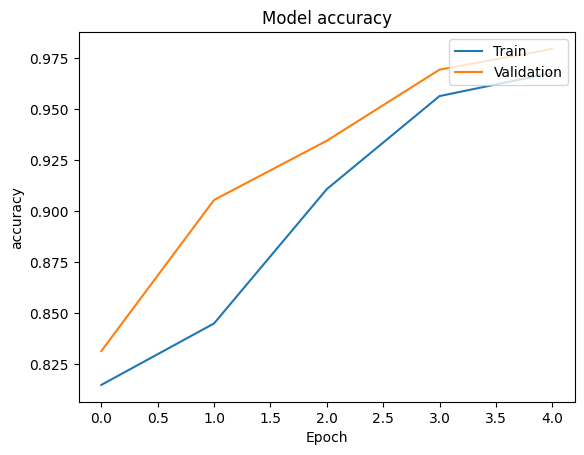

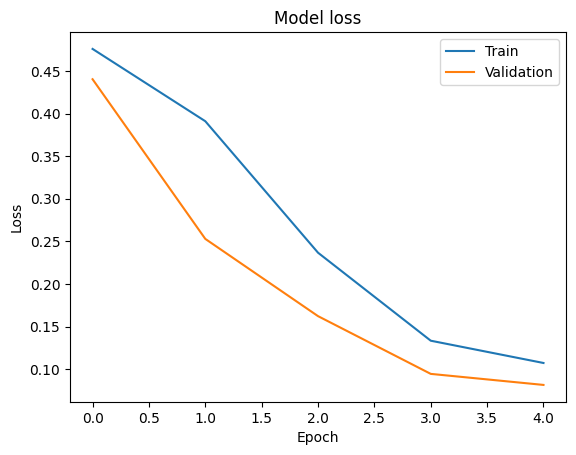

In [44]:
# Plotting the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
Matriz de Confusión:
         Predicción 0  Predicción 1
Clase 0          1600            14
Clase 1            28           421


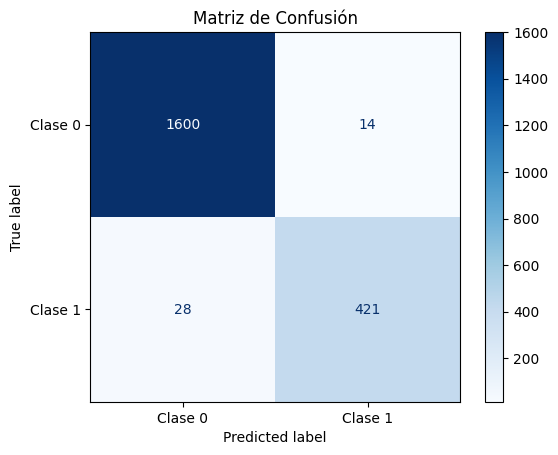

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Hacer predicciones
predictions = model.predict(X_test_padded)

# Convertir las predicciones a etiquetas (0 o 1)
predicted_labels = (predictions > 0.5).astype(int)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicted_labels)

# Crear un DataFrame para visualizar mejor
cm_df = pd.DataFrame(cm, index=['Clase 0', 'Clase 1'], columns=['Predicción 0', 'Predicción 1'])

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm_df)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


In [48]:
# Obtiene las frases de prueba y sus etiquetas verdaderas
test_sentences = X_test.values
true_labels = y_test.values

# Mostrar ejemplos
example_count = 100  # Número de ejemplos a mostrar
for i in range(example_count):
    print(f"Frase: '{test_sentences[i]}'")
    print(f"Clasificación Real: {true_labels[i]}")
    print(f"Predicción del Modelo: {predicted_labels[i][0]}\n")


Frase: 'penguin4784 must maybe ill win lottery able afford'
Clasificación Real: 0
Predicción del Modelo: 0

Frase: 'suzanneevans poor girl feel'
Clasificación Real: 0
Predicción del Modelo: 0

Frase: 'comedybint could done bag chips hammer'
Clasificación Real: 0
Predicción del Modelo: 0

Frase: 'jmcefalas bootstrapcook years noappetitedepression gained weight came 29 bmi good thing though certain someone refuses believe im overweight shattered ideas weight'
Clasificación Real: 1
Predicción del Modelo: 1

Frase: 'way misu minni lady petzz misu minni finnish names'
Clasificación Real: 0
Predicción del Modelo: 0

Frase: 'loved ones ones put depression enemies'
Clasificación Real: 1
Predicción del Modelo: 1

Frase: 'im thankful r scoble invented real time web im joshin unless actually'
Clasificación Real: 0
Predicción del Modelo: 1

Frase: 'happy birthday favorite person whole wide world love ab'
Clasificación Real: 0
Predicción del Modelo: 0

Frase: 'day im home im studyingsoo fuckin bori

In [ ]:
# Crear un DataFrame con las frases
new_sentences = pd.DataFrame({
    'Text': [

    "I feel like I'm trapped in a dark tunnel with no way out.",

    "Some days, even getting out of bed feels like an insurmountable task.",

    "It's like I'm wearing a mask, smiling on the outside but hurting on the inside.",

    "I often feel numb, as if emotions have completely vanished.",

    "Every day feels heavy, like I'm carrying an invisible weight.",

    "I wish I could just disappear and escape this pain.",

    "Sometimes, I feel like I'm drowning in my own thoughts.",

    "I struggle to find joy in things I used to love.",

    "I feel isolated, even when I'm surrounded by people.",

    "It's hard to see a future when today feels so bleak.",

    "The silence in my mind is deafening.",

    "I often question my self-worth and wonder if I truly matter.",

    "There are days when hope feels like a distant memory.",

    "I feel like I'm fighting an invisible battle that no one can see.",

    "It's exhausting pretending to be okay when I'm not.",

    "I wake up every morning feeling a sense of dread.",

    "I feel like I'm a burden to everyone around me.",

    "The darkness feels all-consuming, suffocating me.",

    "Some days, I don't recognize myself in the mirror.",

    "I often wish I could just escape my own mind.",

    "It feels like I'm stuck in a never-ending cycle of sadness.",

    "I feel like I'm constantly walking on a tightrope of despair.",

    "Even simple tasks seem overwhelming and impossible.",

    "I often feel like I'm in a fog, unable to see clearly.",

    "There are days when laughter feels foreign to me.",

    "I feel like I'm screaming inside, but no one can hear me.",

    "The weight of my emotions is too much to bear.",

    "Some days, I question if things will ever get better.",

    "I feel like I'm living in a world that doesn't understand me.",

    "It's hard to find the motivation to do anything at all.",

    "I often feel invisible, like I don't matter.",

    "I feel like I'm on the edge, ready to fall at any moment.",

    "My heart feels heavy, and my mind is restless.",

    "I struggle to find peace in the chaos of my thoughts.",

    "Every moment feels like a battle I can't win.",

    "I often replay my failures in my mind over and over.",

    "I feel lost, as if I'm wandering aimlessly through life.",

    "The future seems dark and uncertain, filled with fear.",

    "Some days, I wish I could just stop feeling altogether.",

    "I feel like I’m stuck in a storm with no way out.",

    "It's hard to reach out for help when I feel so alone.",

    "I often feel trapped in my own thoughts, unable to escape.",

    "I wake up hoping for a better day, only to be disappointed.",

    "The laughter of others feels like a cruel reminder of my sadness.",

    "Some days, I feel like I'm walking through quicksand.",

    "I feel like I'm fighting a war inside my own head.",

    "It's hard to find a reason to keep going when I feel this way.",

    "I often feel like I'm living in a nightmare I can't wake up from.",

    "Every day feels like an uphill battle I can't win.",

    "I feel like I'm fading away, losing myself piece by piece.",

    "Sometimes, I wish I could just turn off my emotions.",

    "The darkness feels like a thick blanket smothering me.",

    "I often feel like I’m running on empty, with nothing left to give.",

    "It's hard to explain my feelings when I can't even understand them myself.",

    "I feel like I'm trapped in a maze with no exit in sight.",

    "Sometimes, I feel like I'm screaming into the void.",

    "I often wonder if anyone would notice if I disappeared.",

    "I feel like I'm carrying the weight of the world on my shoulders.",

    "Some days, it feels like I'm walking through life in slow motion.",

    "I often feel like I'm living in a shadow of my former self.",

    "The world feels dull and colorless when I'm in this state.",

    "I wish I could find a way to escape this pain.",

    "I feel like I'm watching life pass me by from the sidelines.",

    "It's hard to find the energy to keep fighting this battle.",

    "I often feel like I'm stuck in a loop of negativity.",

    "Some days, I feel like I'm drowning in my own sadness.",

    "I wish I could just find a glimmer of hope.",

    "I often feel like I'm walking through a fog that never lifts.",

    "It's hard to remember what happiness feels like.",

    "I feel like I'm lost in a sea of despair.",

    "Every day feels like a struggle just to survive.",

    "I often feel like I'm fighting against the current.",

    "It's exhausting to feel this way all the time.",

    "I wish I could find peace in the chaos of my mind.",

    "I feel like I'm living in a world that's lost all its color.",

    "Some days, I wish I could just sleep forever.",

    "I often feel like I'm trapped in a cycle of hopelessness.",

    "It's hard to see the light when all I feel is darkness.",

    "I feel like I'm stuck in a never-ending nightmare.",

    "I often question if anyone truly understands my pain.",

    "I feel like I'm fighting an uphill battle with no end in sight.",

    "It's hard to find the strength to keep going when I feel this way.",

    "I wish I could find a way to break free from this sadness.",

    "I often feel like I'm wandering through a desert of despair."

]
})

In [96]:
# Preprocesar las frases de la misma forma que tus datos de entrenamiento
new_sentences['Text'] = new_sentences['Text'].str.lower()
new_sentences['Text'] = new_sentences['Text'].apply(remove_html_tags)
new_sentences['Text'] = new_sentences['Text'].apply(remove_urls)
new_sentences['Text'] = new_sentences['Text'].apply(remove_punctuation)
new_sentences['Text'] = new_sentences['Text'].apply(replace_chat_words)
new_sentences['Text'] = new_sentences['Text'].apply(remove_stopwords)
new_sentences['Text'] = new_sentences['Text'].apply(remove_emojis)
new_sentences['Text_lemmatized'] = new_sentences['Text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word , pos='v') for word in x.split()]))

# Tokenizar las nuevas frases
new_sequences = tokenizer.texts_to_sequences(new_sentences['Text_lemmatized'])
new_padded = pad_sequences(new_sequences, maxlen=maxlen, padding='post')

# Hacer predicciones
predictions = model.predict(new_padded)
predicted_classes = (predictions > 0.5).astype(int)

# Mostrar resultados
for sentence, pred in zip(new_sentences['Text'], predicted_classes):
    sentiment = "Positive (0)" if pred == 0 else "Negative (1)"
    print(f"Sentence: '{sentence}' => Sentiment: {sentiment}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Sentence: 'feel like im trapped dark tunnel way' => Sentiment: Positive (0)
Sentence: 'days even getting bed feels like insurmountable task' => Sentiment: Positive (0)
Sentence: 'like im wearing mask smiling outside hurting inside' => Sentiment: Positive (0)
Sentence: 'often feel numb emotions completely vanished' => Sentiment: Positive (0)
Sentence: 'every day feels heavy like im carrying invisible weight' => Sentiment: Positive (0)
Sentence: 'wish could disappear escape pain' => Sentiment: Positive (0)
Sentence: 'sometimes feel like im drowning thoughts' => Sentiment: Positive (0)
Sentence: 'struggle find joy things used love' => Sentiment: Positive (0)
Sentence: 'feel isolated even im surrounded people' => Sentiment: Positive (0)
Sentence: 'hard see future today feels bleak' => Sentiment: Positive (0)
Sentence: 'silence mind deafening' => Sentiment: Positive (0)
Sentence: 'often question selfworth wonder truly matter' => Sentiment: Positive (0)
